In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 

df = pd.read_excel('Amazon 2_Raw.xlsx')


In [13]:
df.head(5)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   Sales         3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [5]:
df['Total Sales'] = df['Quantity'] * df['Sales']

In [6]:
df['Total Sales']

0         29.240
1        342.020
2         29.120
3       3628.608
4         55.512
          ...   
3198      36.240
3199     183.920
3200     517.152
3201     118.400
3202     486.320
Name: Total Sales, Length: 3203, dtype: float64

In [7]:
df['no_of_days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [8]:
df[['Country','City','State']] =  df['Geography'].str.split(',', n=2, expand=True)

In [26]:
df.head(5)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,Total Sales,no_of_days,Country,City,State
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,29.240,4,United States,Los Angeles,California
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,342.020,5,United States,Los Angeles,California
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656,29.120,5,United States,Los Angeles,California
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,3628.608,5,United States,Los Angeles,California
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,55.512,5,United States,Los Angeles,California


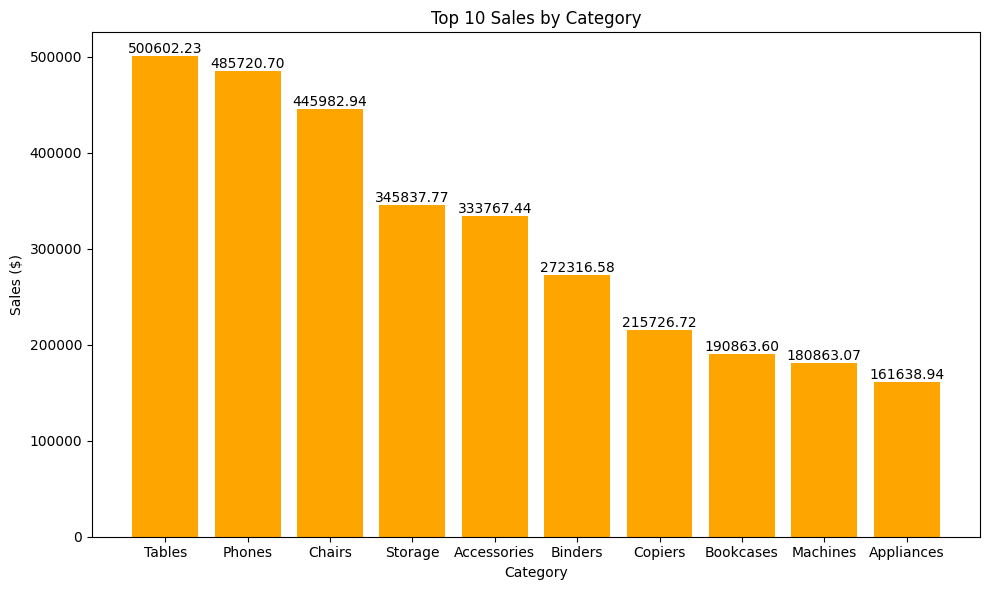

In [8]:
# Grouping and summarizing
grouped = df.groupby('Category')['Total Sales'].sum().reset_index()

# Sort and get top 10
top10 = grouped.sort_values(by='Total Sales', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top10['Category'], top10['Total Sales'], color='orange')
plt.title('Top 10 Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales ($)')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


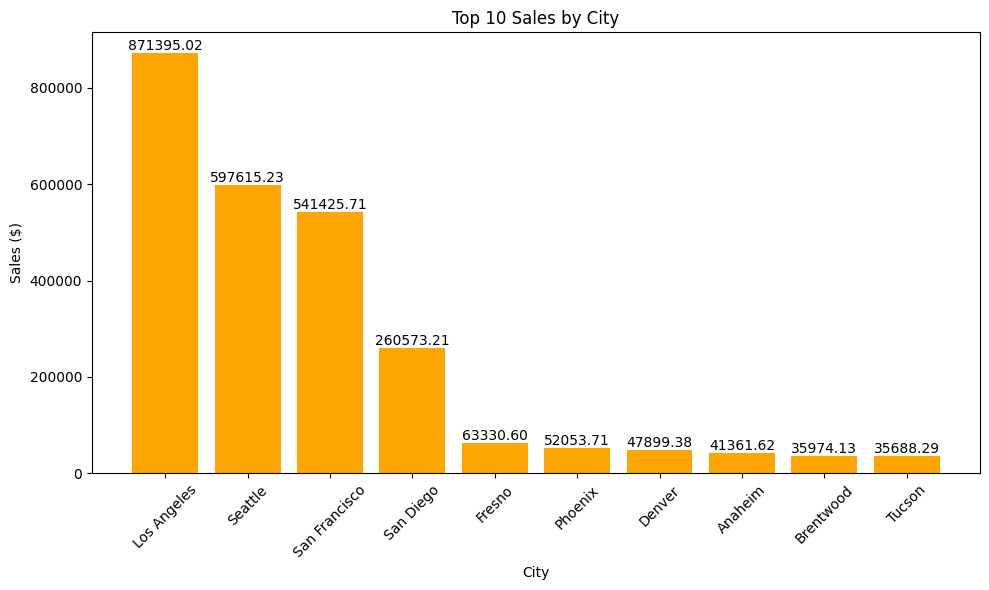

In [10]:
grouped = df.groupby('City')['Total Sales'].sum().reset_index()

# Sort and get top 5
top10 = grouped.sort_values(by='Total Sales', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top10['City'], top10['Total Sales'], color='orange')
plt.title('Top 10 Sales by City')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [9]:
grouped = df.groupby('City')['no_of_days'].mean().reset_index()

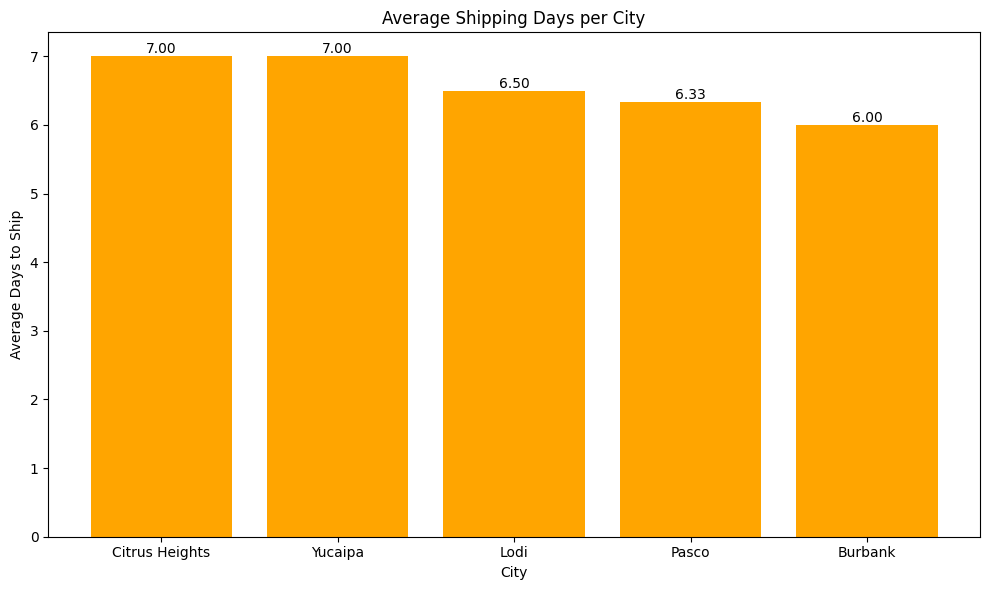

In [12]:
#Sort and get top 5
top5 = grouped.sort_values(by='no_of_days', ascending=False).head(5)

plt.figure(figsize=(10, 6))
bars = plt.bar(top5['City'], top5['no_of_days'], color='orange')
plt.title('Average Shipping Days per City')
plt.xlabel('City')
plt.ylabel('Average Days to Ship')

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height ,
            f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [14]:
df['month_name'] = df['Order Date'].dt.strftime('%B')

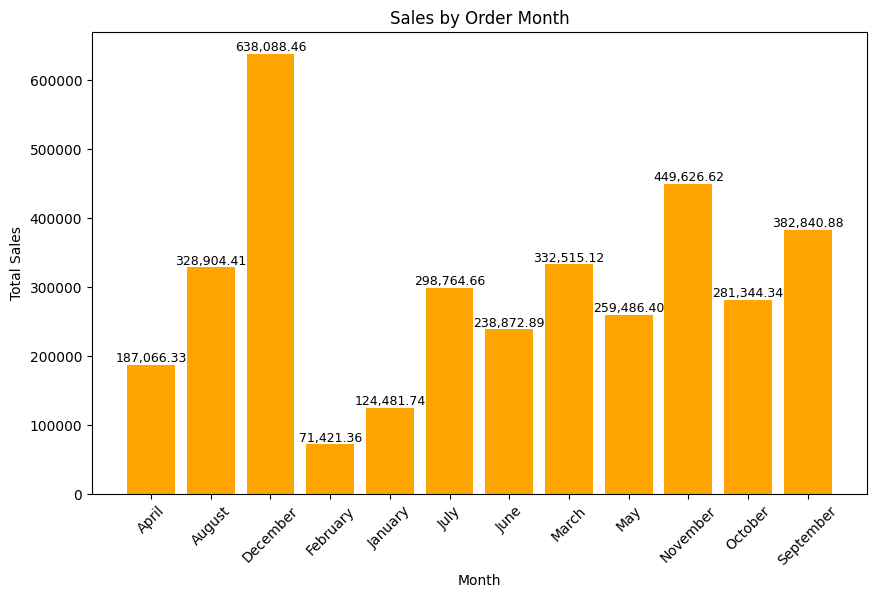

In [14]:
monthly_sales = df.groupby('month_name')['Total Sales'].sum().reset_index()

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(monthly_sales['month_name'], monthly_sales['Total Sales'], color='orange')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:,.2f}', 
             ha='center', va='bottom', fontsize=9)
plt.title('Sales by Order Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.xticks(rotation=45)

plt.show()

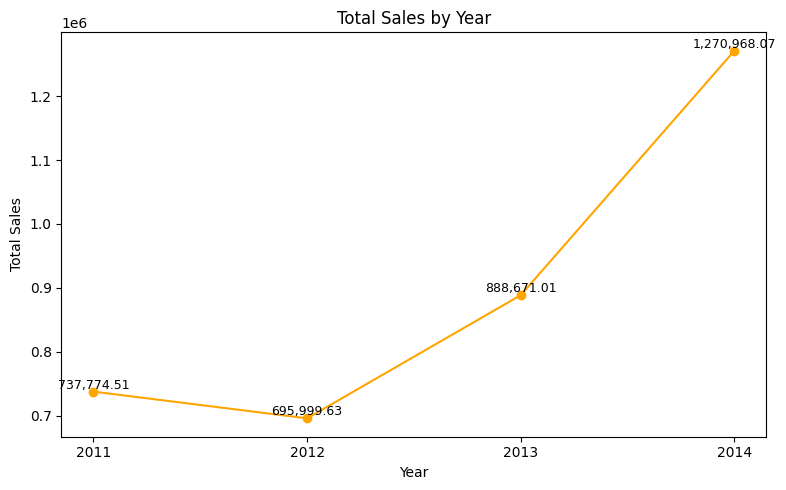

In [30]:
# Extract year from Order Date
df["Year"] = df["Order Date"].dt.year
 
# Group by Year and sum Sales
sales_by_year = df.groupby("Year")["Total Sales"].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(sales_by_year["Year"], sales_by_year["Total Sales"], marker='o',color = 'orange')

for i in range(len(sales_by_year)):
    year = sales_by_year["Year"][i]
    TotalSales = sales_by_year["Total Sales"][i]
    plt.text(year, TotalSales, f'{TotalSales :,.2f}', ha='center', va='bottom', fontsize=9)

plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(sales_by_year["Year"])
plt.tight_layout()
plt.show()


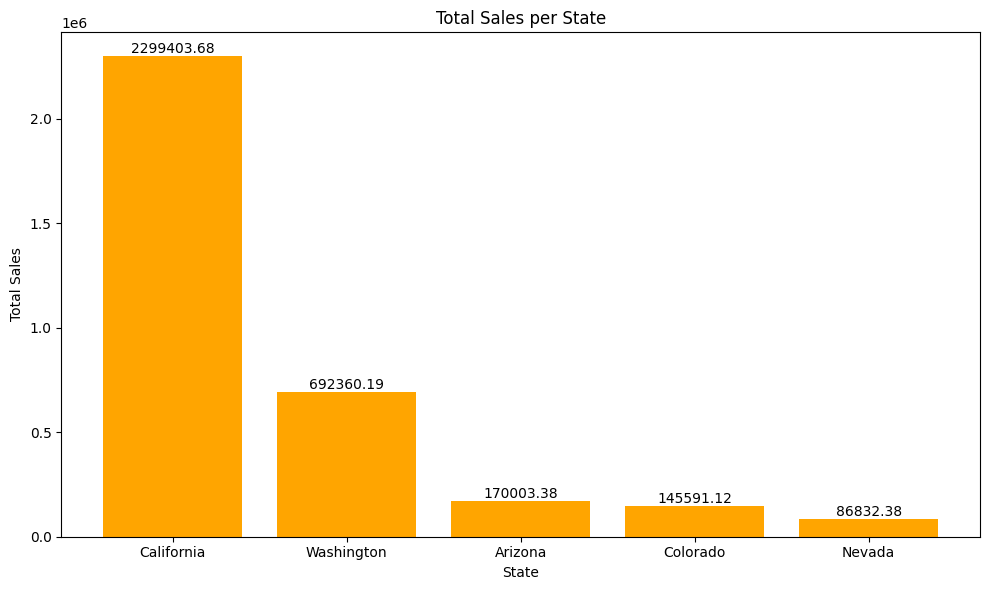

In [51]:
grouped = df.groupby('State')['Total Sales'].sum().reset_index()

top5 = grouped.sort_values(by='Total Sales', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top5['State'], top5['Total Sales'], color='orange')
plt.title('Total Sales per State')
plt.xlabel('State')
plt.ylabel('Total Sales')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height ,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

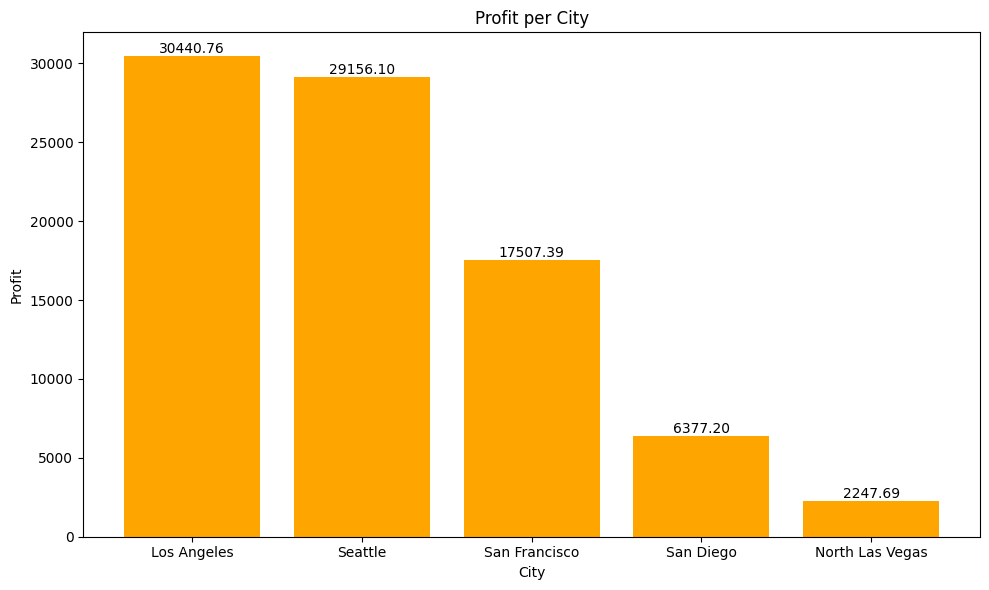

In [12]:
grouped = df.groupby('City')['Profit'].sum().reset_index()

top5 = grouped.sort_values(by='Profit', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top5['City'], top5['Profit'], color='orange')
plt.title('Profit per City')
plt.xlabel('City')
plt.ylabel('Profit')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height ,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

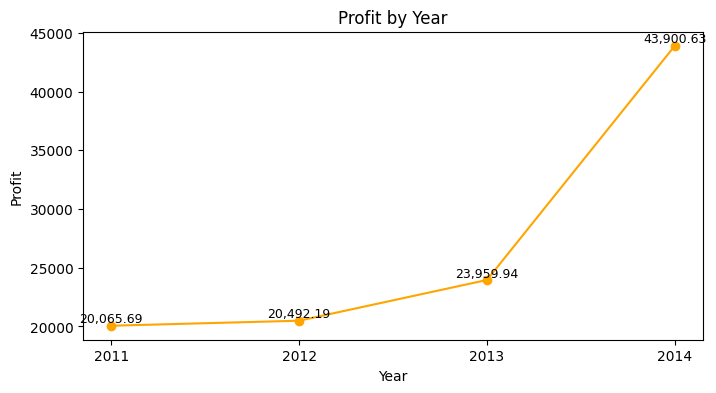

In [28]:
profit_by_year = df.groupby("Year")["Profit"].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(profit_by_year["Year"], profit_by_year["Profit"], marker='o',color='orange')
for i in range(len(profit_by_year)):
    year = profit_by_year["Year"][i]
    profit = profit_by_year["Profit"][i]
    plt.text(year, profit, f'{profit:,.2f}', ha='center', va='bottom', fontsize=9)

plt.title("Profit by Year")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.xticks(profit_by_year["Year"])

plt.show()

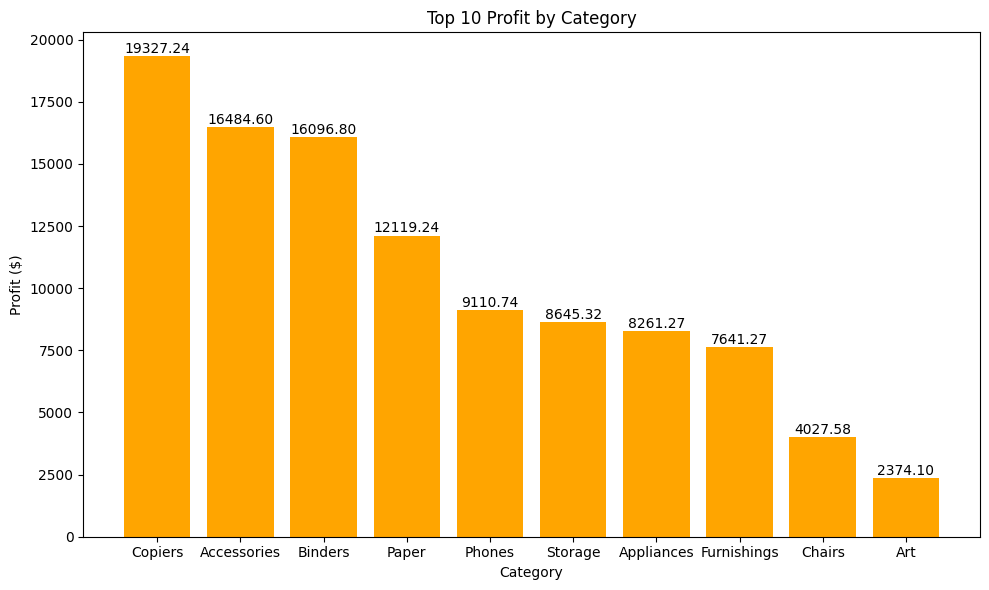

In [17]:
grouped = df.groupby('Category')['Profit'].sum().reset_index()

# Sort and get top 10
top10 = grouped.sort_values(by='Profit', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top10['Category'], top10['Profit'], color='orange')
plt.title('Top 10 Profit by Category')
plt.xlabel('Category')
plt.ylabel('Profit ($)')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


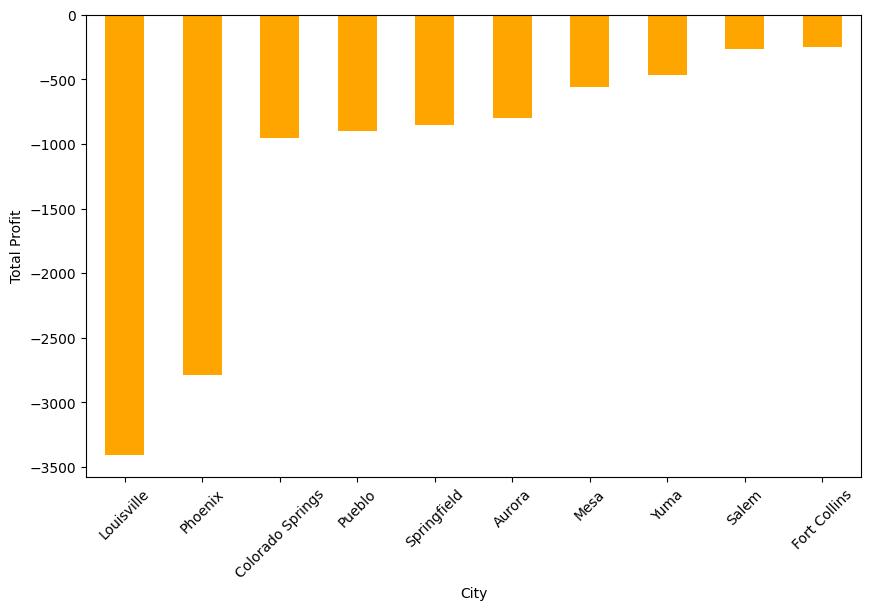

In [48]:
city_profit = df.groupby('City')['Profit'].sum()

# Get the 10 categories with the lowest total profit
least_profitable = city_profit.nsmallest(10)

# Plotting
plt.figure(figsize=(10, 6))
least_profitable.plot(kind='bar', color='orange')
                                                                                                                                                                                    
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

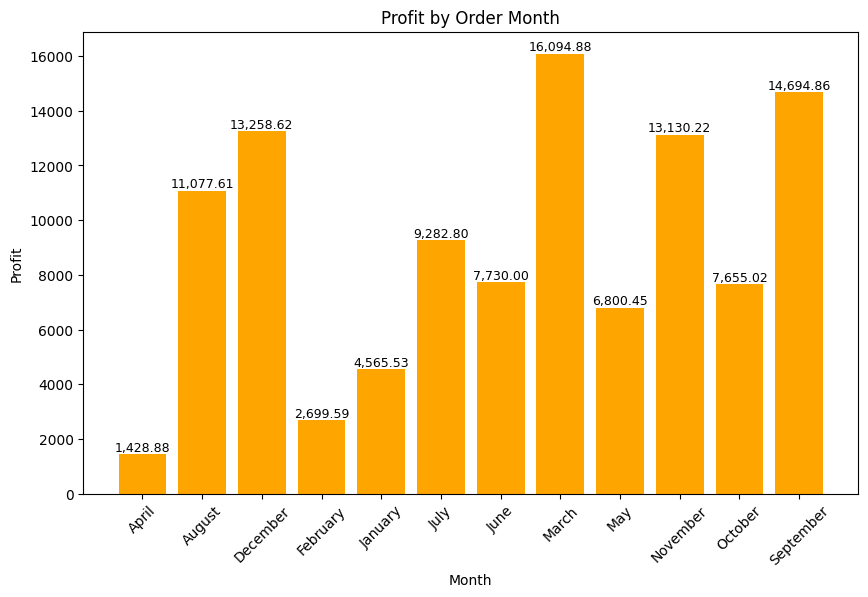

In [50]:
monthly_sales = df.groupby('month_name')['Profit'].sum().reset_index()

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(monthly_sales['month_name'], monthly_sales['Profit'], color='orange')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:,.2f}', 
             ha='center', va='bottom', fontsize=9)
plt.title('Profit by Order Month')
plt.xlabel('Month')
plt.ylabel('Profit')

plt.xticks(rotation=45)

plt.show()

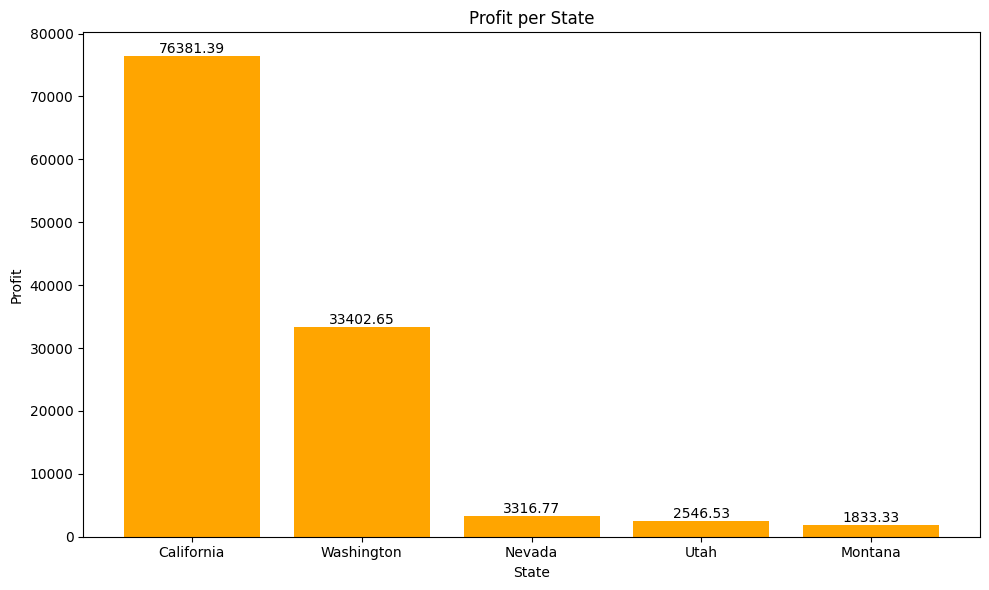

In [52]:
grouped = df.groupby('State')['Profit'].sum().reset_index()

top5 = grouped.sort_values(by='Profit', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top5['State'], top5['Profit'], color='orange')
plt.title('Profit per State')
plt.xlabel('State')
plt.ylabel('Profit')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height ,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

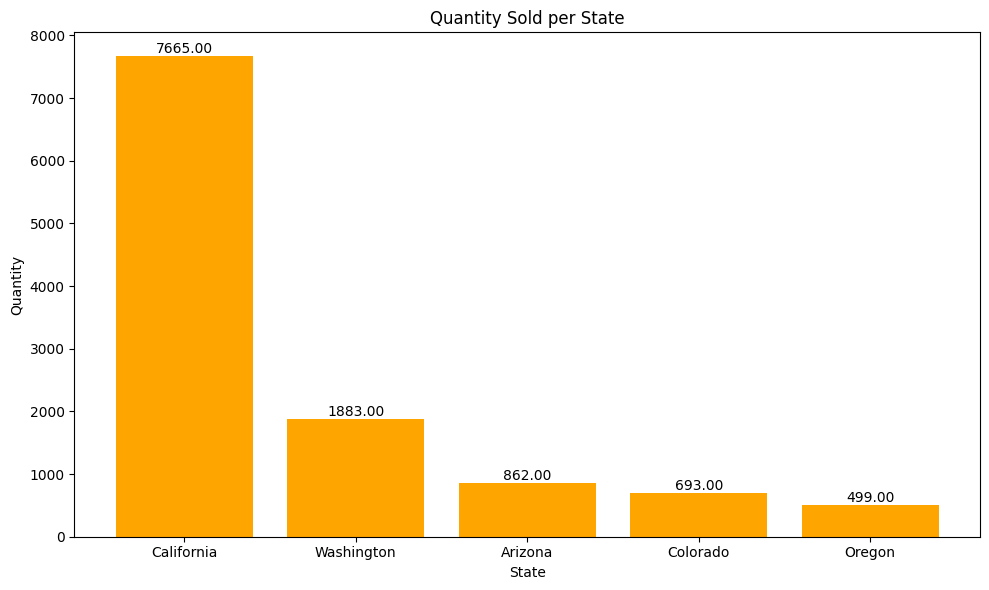

In [11]:
grouped = df.groupby('State')['Quantity'].sum().reset_index()

top5 = grouped.sort_values(by='Quantity', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top5['State'], top5['Quantity'], color='orange')
plt.title('Quantity Sold per State')
plt.xlabel('State')
plt.ylabel('Quantity')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height ,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


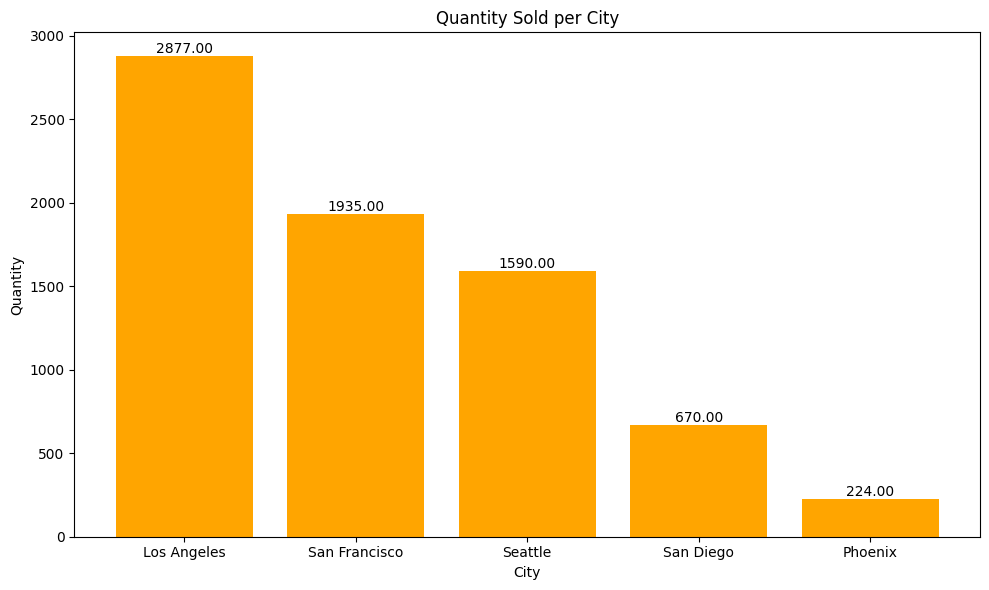

In [12]:
grouped = df.groupby('City')['Quantity'].sum().reset_index()

top5 = grouped.sort_values(by='Quantity', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top5['City'], top5['Quantity'], color='orange')
plt.title('Quantity Sold per City')
plt.xlabel('City')
plt.ylabel('Quantity')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height ,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


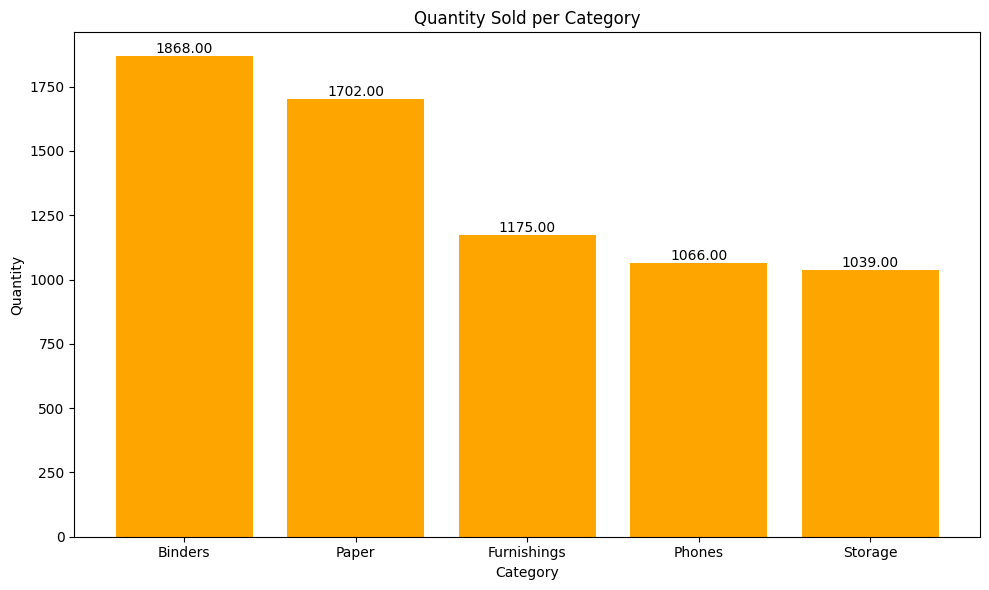

In [13]:
grouped = df.groupby('Category')['Quantity'].sum().reset_index()

top5 = grouped.sort_values(by='Quantity', ascending=False).head(5)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(top5['Category'], top5['Quantity'], color='orange')
plt.title('Quantity Sold per Category')
plt.xlabel('Category')
plt.ylabel('Quantity')

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height ,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


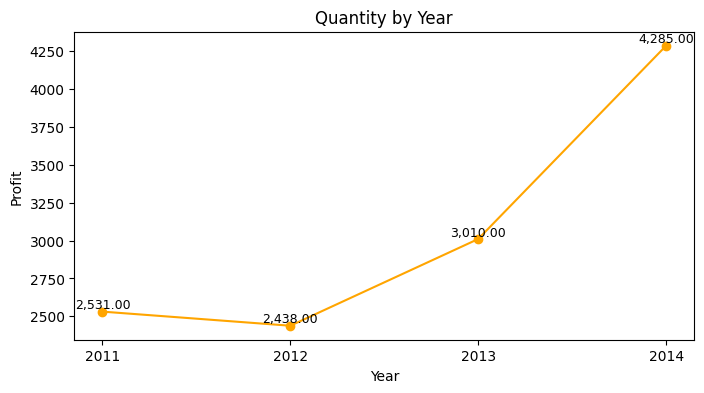

In [20]:
df["Year"] = df["Order Date"].dt.year
Quantity_by_year = df.groupby("Year")["Quantity"].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(Quantity_by_year["Year"], Quantity_by_year["Quantity"], marker='o',color='orange')
for i in range(len(Quantity_by_year)):
    year = Quantity_by_year["Year"][i]
    Quantity = Quantity_by_year["Quantity"][i]
    plt.text(year, Quantity, f'{Quantity:,.2f}', ha='center', va='bottom', fontsize=9)

plt.title("Quantity by Year")
plt.xlabel("Year")
plt.ylabel("Profit")
plt.xticks(Quantity_by_year["Year"])

plt.show()

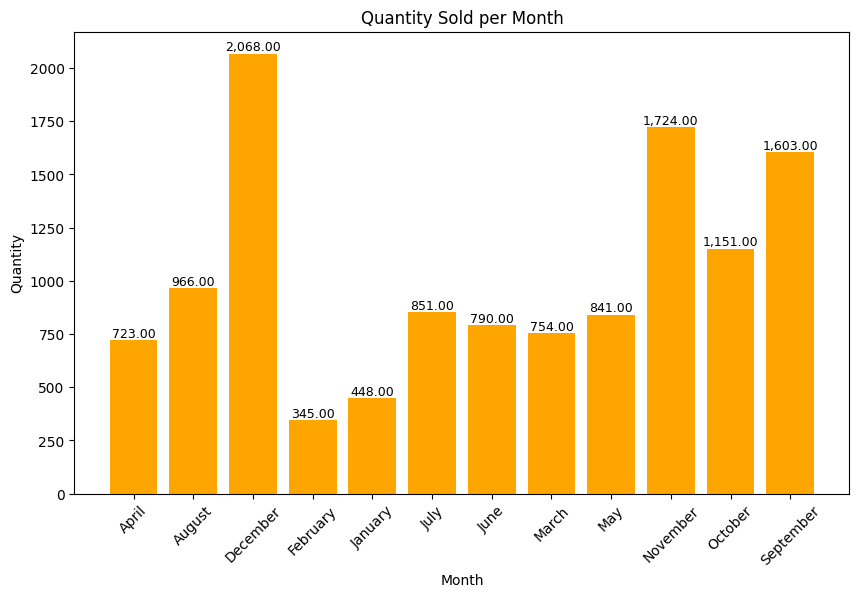

In [22]:
df['month_name'] = df['Order Date'].dt.strftime('%B')
monthly_Quantity_sales = df.groupby('month_name')['Quantity'].sum().reset_index()

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(monthly_Quantity_sales['month_name'], monthly_Quantity_sales['Quantity'], color='orange')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:,.2f}', 
             ha='center', va='bottom', fontsize=9)
plt.title('Quantity Sold per Month')
plt.xlabel('Month')
plt.ylabel('Quantity')

plt.xticks(rotation=45)

plt.show()